# Earthquake Prediction
It is well known that if a disaster has happened in a region, it is likely to happen there again. Some regions really have frequent earthquakes, but this is just a comparative quantity compared to other regions.
So, predicting the earthquake with Date and Time, Latitude and Longitude from previous data is not a trend which follows like other things, it is natural occuring. 

Import the necessary libraries required for buidling the model and data analysis of the earthquakes.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import os
# print(os.listdir("../input"))

Read the data from csv and also columns which are necessary for the model and the column which needs to be predicted.

In [4]:
data = pd.read_csv("/kaggle/input/earthquake/database.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
# data.columns
data.info

<bound method DataFrame.info of              Date      Time    ...      Magnitude Source     Status
0      01/02/1965  13:44:18    ...                ISCGEM  Automatic
1      01/04/1965  11:29:49    ...                ISCGEM  Automatic
2      01/05/1965  18:05:58    ...                ISCGEM  Automatic
3      01/08/1965  18:49:43    ...                ISCGEM  Automatic
4      01/09/1965  13:32:50    ...                ISCGEM  Automatic
5      01/10/1965  13:36:32    ...                ISCGEM  Automatic
6      01/12/1965  13:32:25    ...                ISCGEM  Automatic
7      01/15/1965  23:17:42    ...                ISCGEM  Automatic
8      01/16/1965  11:32:37    ...                ISCGEM  Automatic
9      01/17/1965  10:43:17    ...                ISCGEM  Automatic
10     01/17/1965  20:57:41    ...                ISCGEM  Automatic
11     01/24/1965  00:11:17    ...                ISCGEM  Automatic
12     01/29/1965  09:35:30    ...                ISCGEM  Automatic
13     02/01/196

Figure out the main features from earthquake data and create a object of that features, namely, Date, Time, Latitude, Longitude, Depth, Magnitude.

In [6]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


Here, the data is random we need to scale according to inputs to the model. In this, we convert given Date and Time to Unix time which is in seconds and a numeral. This can be easily used as input for the network we built.

In [7]:
data.dropna()
data.drop_duplicates()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.2460,145.6160,131.60,6.0
1,01/04/1965,11:29:49,1.8630,127.3520,80.00,5.8
2,01/05/1965,18:05:58,-20.5790,-173.9720,20.00,6.2
3,01/08/1965,18:49:43,-59.0760,-23.5570,15.00,5.8
4,01/09/1965,13:32:50,11.9380,126.4270,15.00,5.8
5,01/10/1965,13:36:32,-13.4050,166.6290,35.00,6.7
6,01/12/1965,13:32:25,27.3570,87.8670,20.00,5.9
7,01/15/1965,23:17:42,-13.3090,166.2120,35.00,6.0
8,01/16/1965,11:32:37,-56.4520,-27.0430,95.00,6.0
9,01/17/1965,10:43:17,-24.5630,178.4870,565.00,5.8


In [8]:
print(data.mean())
print(data.median())
print(data.mode())

Latitude      1.679033
Longitude    39.639961
Depth        70.767911
Magnitude     5.882531
dtype: float64
Latitude      -3.5685
Longitude    103.9820
Depth         33.0000
Magnitude      5.7000
dtype: float64
         Date      Time  Latitude  Longitude  Depth  Magnitude
0  03/11/2011  02:56:58    -5.902    126.777   10.0        5.5
1         NaN  14:09:03    -5.605        NaN    NaN        NaN
2         NaN       NaN    -5.589        NaN    NaN        NaN
3         NaN       NaN    51.500        NaN    NaN        NaN


In [16]:
# Standard deviation is a statistical measure that quantifies the amount of variation or dispersion in a dataset. 
# It tells us how much individual data points deviate from the mean (average) of the dataset. 
# A higher standard deviation indicates greater variability, while a lower standard deviation suggests that the data points are closer to the mean.


import statistics

# Calculate the standard deviation of the 'magnitude' column
magnitude_std = data['Magnitude'].std()
print("Standard Deviation of Magnitude:", magnitude_std)

# In this code, the 'std()' function is applied to the 'magnitude' column of the DataFrame to compute the standard deviation.
# The result will be a single value representing the standard deviation of the earthquake magnitudes in the dataset.

# Interpreting the standard deviation value:
# If the standard deviation is close to 0, it indicates that the magnitudes are very close to the mean, 
# and the dataset has low variability in terms of earthquake magnitudes.
# If the standard deviation is relatively high, it suggests that the magnitudes are spread out over a wide range,
# and the dataset has higher variability in terms of earthquake magnitudes.



# sample_std = statistics.stdev(data['Latitude'])
# population_std = statistics.pstdev(data['Latitude'])
# print('Sample standard deviation: ', sample_std)
# print('Population standard deviation: ', population_std)

Standard Deviation of Magnitude: 0.4230656393157772


In [27]:
sample_std = statistics.stdev(data['Latitude'])
population_std = statistics.pstdev(data['Latitude'])
print('Sample standard deviation: ', sample_std)
print('Population standard deviation: ', population_std)

Sample standard deviation:  30.113182898720652
Population standard deviation:  30.11253977757631


In [20]:
import datetime
from datetime import datetime
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.datetime.timestamp != 'ValueError']
final_data.head()

AttributeError: 'DataFrame' object has no attribute 'datetime'

In [21]:
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


## Visualization
Here, all the earthquakes from the database in visualized on to the world map which shows clear representation of the locations where frequency of the earthquake will be more. 

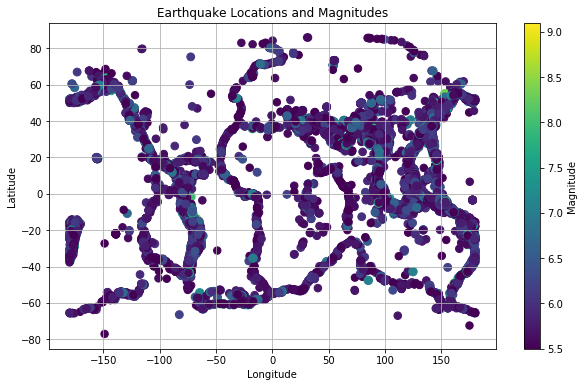

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset has columns named 'latitude', 'longitude', and 'magnitude'
# Scatter plot of earthquake locations colored by magnitude
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Magnitude'], cmap='viridis', s=data['Magnitude']*10)
plt.colorbar(label='Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Locations and Magnitudes')
plt.grid(True)
plt.show()
# This code will create a scatter plot with earthquake locations represented by points, 
# and the magnitude of each earthquake will be represented by the color intensity of the points.

# c=data['Magnitude']: This parameter sets the color of each point in the scatter plot based on the 'Magnitude' column of the 'data' DataFrame. 
#     The color of the points will be determined by the magnitude values.

# cmap='viridis': This parameter sets the color map to be used for mapping the magnitude values to colors. 
#     In this case, 'viridis' is a built-in color map in Matplotlib that represents low magnitudes with lighter colors and high magnitudes with darker colors.
# plasma' ,'inferno': ,'magma': , 'cividis':  ,'coolwarm'

# s=data['Magnitude']*10: This parameter sets the size of each point in the scatter plot based on the 'Magnitude' column of the 'data' DataFrame. 
#     The size of the points will be proportional to the magnitude values multiplied by 10, making larger magnitudes result in bigger points.

# plt.colorbar(label='Magnitude'): This line adds a color bar to the plot, which is a visual representation of the mapping between colors and magnitude values. 
#     The color bar provides a reference scale to understand the magnitude values corresponding to different colors on the scatter plot.

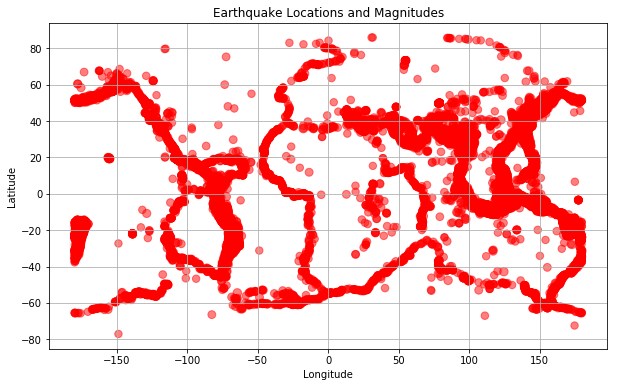

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting earthquake data on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], s=data['Magnitude']*10, c='red', alpha=0.5)

plt.title('Earthquake Locations and Magnitudes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()


In [23]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


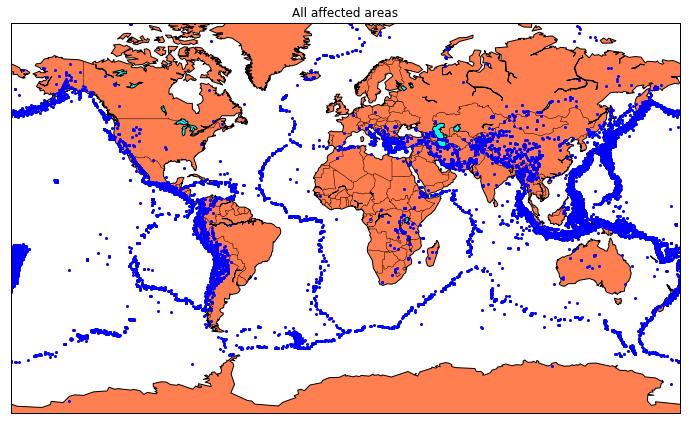

In [24]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [25]:
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [ ]:
# folium.Choropleth(

# # geographical locations
# geo_data = state_geo,
# name = "Earthquake",

# # the data set we are using
# data = data,
# columns = ["Latitude", "Magnitude"],

# # YlGn refers to yellow and green
# fill_color = "YlGn",
# fill_opacity = 0.7,
# line_opacity = .1,
# key_on = "feature.id",
# legend_name = "Unemployment Rate (%)",
# ).add_to(m)

# m.save('final_map.html')


### Splitting the Data
Firstly, split the data into Xs and ys which are input to the model and output of the model respectively. Here, inputs are TImestamp, Latitude and Longitude and outputs are Magnitude and Depth. Split the Xs and ys into train and test with validation. Training dataset contains 80% and Test dataset contains 20%.

In [16]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

In [17]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 3)


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Here, we used the RandomForestRegressor model to predict the outputs, we see the strange prediction from this with score above 80% which can be assumed to be best fit but not due to its predicted values.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

In [ ]:
best_fit.score(X_test, y_test)

### Neural Network model
In the above case it was more kind of linear regressor where the predicted values are not as expected. So, Now, we build the neural network to fit the data for training set. Neural Network consists of three Dense layer with each 16, 16, 2 nodes and relu, relu and softmax as activation function.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In this, we define the hyperparameters with two or more options to find the best fit.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

Here, we find the best fit of the above model and get the mean test score and standard deviation of the best fit model.

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

The best fit parameters are used for same model to compute the score with training data and testing data.

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

In [ ]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

We see that the above model performs better but it also has lot of noise (loss) which can be neglected for prediction and use it for furthur prediction.

The above model is saved for furthur prediction.

In [ ]:
model.save('earthquake.h5')